# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [ ]:

!ls '/content/drive/MyDrive/Copy of documents.rar'

'/content/drive/MyDrive/Copy of documents.rar'


In [ ]:
!unrar x '/content/drive/MyDrive/Copy of documents.rar' 

Streaming output truncated to the last 5000 lines.
Extracting  documents/sci.space_60893.txt                                 66%  OK 
Extracting  documents/sci.space_60894.txt                                 66%  OK 
Extracting  documents/sci.space_60895.txt                                 66%  OK 
Extracting  documents/sci.space_60896.txt                                 66%  OK 
Extracting  documents/sci.space_60897.txt                                 66%  OK 
Extracting  documents/sci.space_60898.txt                                 66%  OK 
Extracting  documents/sci.space_60899.txt                                 66%  OK 
Extracting  documents/sci.space_60900.txt                                 66%  OK 
Extracting  documents/sci.space_60901.txt                                 66%  OK 
Extracting  documents/sci.space_60902.txt                                 66%  OK 
Extracting  documents/sci.spa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<IPython.core.display.Javascript object>


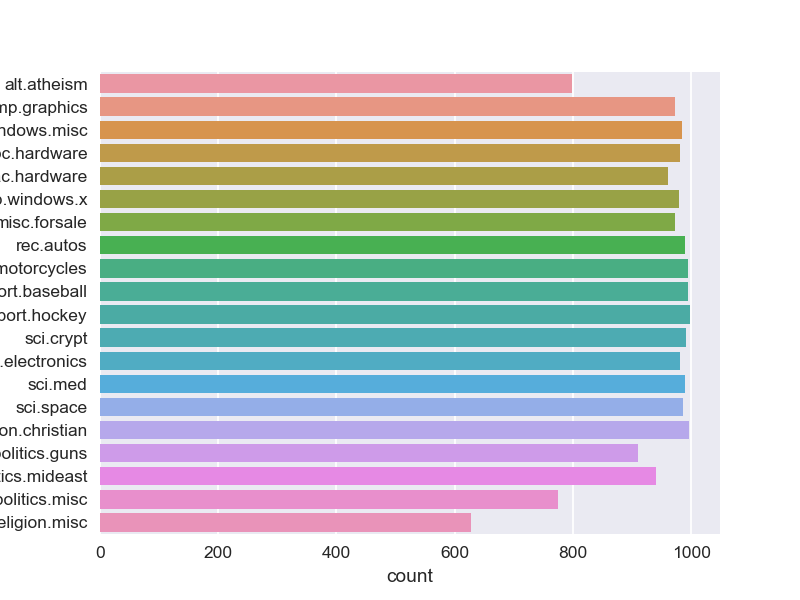

In [ ]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

In [ ]:
k=34

raw_data = [] 

import os
directory = r'/content/documents'

i=0
class_documents=[]
for f in os.listdir(directory): # for each file in the subfolder
    
  if f.endswith(".txt"): # check for text file
    fname = directory + "/" + f
    end=f.find('_')
    s=f[0:end]
    class_documents.append(s)

    q= open(fname,encoding='ISO-8859-1') # read file 
   
    file=q.read()
    #if i!=0:
    
    raw_data.append(file)
    
        
    i += 1

    #if i==k: 
     # break




In [ ]:
raw_data

['Subject: Lexus and Infiniti\nFrom: w00026@TIGGER.STCLOUD.MSUS.EDU\n\nFirst off, the correct spelling of Nissan\'s luxury automobile division\nis "Infiniti" not "Infinity."  I would also like to clear up the question\nof what kind of engines power Lexus and Infiniti automobiles, since a\nperson had remarked in earlier posts that most Lexus and Infiniti models\nhad V6 engines, while at the same time saying that several of each\nmanufacturer used V8 engines.\n\nLexus:\n  LS400- V8\n  GS300- V6\n  ES300- V6\n  SC400- V8\n  SC300- V6\n\nInfiniti:\n  Q45- V8\n  J30- V6\n  G20- inline 4 (I must admit that I cannot remeber for sure here)\n\nI hope this helps.\n\n-BSB\n',
 "From: mcbride@ohsu.edu (Ginny McBride)\nSubject: Re: Trumpet for Windows & other news readers\n\nIn article <ashok.653.0@biochemistry.cwru.edu> ashok@biochemistry.cwru.edu (Ashok Aiyar) writes:\n\n>In article <1993Apr21.082430@liris.tew.kuleuven.ac.be> wimvh@liris.tew.kuleuven.ac.be (Wim Van Holder) writes:\n\n>>What the s

In [ ]:
len(raw_data)

18828

In [ ]:
len(class_documents)

18828

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
import re
cnt=0
list1=[]
for i in range(len(raw_data)): 
  email = re.findall(r"[a-zA-Z0-9\.\-+_]+@[a-zA-Z0-9\.\-+_]+\.[a-zA-Z]+", raw_data[i])
  cnt+=1
  list1.append(email)
print(cnt)

18828


In [ ]:
list1

In [ ]:
list2=[]
for i in range(len(list1)):

  for j in range(len(list1[i])):
    
    z=list1[i][j]
    x=list1[i][j]

    
    cnt=0
    cnt2=0
    for k in x:
      cnt+=1
      if k=='@':
        x=x.replace(z[cnt-1],'',1)
        break
      else:
        x=x.replace(z[cnt2],'',1)
        cnt2+=1
    x=x.split('.')
   
    x2=[]
    x3=[]
    for l in range(len(x)):
      if len(x[l])>2:
        x2.append(x[l])
    
      if 'com' in x2:
        x2.remove('com')

  list2.append(x2) 

In [ ]:
for i in range(len(list2)):
  list2[i]=" ".join(list2[i])

In [ ]:
list2 ##answer till 1

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email=list2

In [ ]:
len(preprocessed_email)

18828

part 2

In [ ]:
##replace all emails with " " in orignal text
import re
list3=[]
for i in range(len(raw_data)):
  except_email = re.sub(r"[a-zA-Z0-9\.\-+_]+@[a-zA-Z0-9\.\-+_]+\.[a-zA-Z]+","", raw_data[i])
  except_email=re.sub("\n\n",'\n',except_email)
  list3.append(except_email)

In [ ]:
len(list3)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
subjects=[]
lines=[]
for i in range(len(list3)):
  x=list3[i]
  z=list3[i]
  cnt=0
  cnt2=0
  cnt3=0
  cnt4=0
  sub=x.split("\n", 2)
  a=sub[1]
  b=sub[1]
  for j in a:
    cnt+=1
    if j==":":
      a=a.replace(b[cnt-1],'',1)
      break
    else:
      a=a.replace(b[cnt2],'',1)
      cnt2+=1
  b=a
  for k in a:
    cnt3+=1
    if k==":":
      a=a.replace(b[cnt3-1],'',1)
      break
    else:
      a=a.replace(b[cnt4],'',1)
      cnt4+=1
  a=re.sub("<>","",a)
  a=re.sub('---',"",a)
  #a=re.sub('  ',"",s)
  #a=re.sub('\n',"",a)
  a=re.sub('\t',"",a)
  #a=re.sub('_',"",a)
  #a=re.sub('[^a-zA-Z \n\.]', '', a)
  a=re.sub("can't","can not",a)
  a=re.sub("'s","is",a)
  a=re.sub("i've","i have",a)
  a=re.sub("you're","you are",a)
  a=re.sub("i'll","i will",a)
  a=re.sub("i'm","i am",a)
  subjects.append(a)
  

In [ ]:
subjects  ##preprocessed subjects

Preprocessed text

In [ ]:
list3[3]

'From:   (Jen Kilmer)\nSubject: Re: re: Challenge to Microsoft supporters.\nIn article <1slalp$ >   (Jeffrey A Waller) writes:\n>In article <1993M >,   (Jen Kilmer) writes:\n>|> In article <C6rq6B.F >   (Brett Ferrell) writes:\n>|> >In article <1993M >   (Clifford Garrett) writes:\n>|> >>/I guess thats why there are so many new DOS and OS/2 applications\n>|> >>/coming and hardly any Windows apps coming out? (irony)\n>|> >>\n>|> >>Yep,  the os/2 apps are comming, the os/2 apps are comming. \n>|> >\n>|> >Yet another Micro-minion hoping that if he says something long enough, \n>|> >\n>|> Hey, I remember the good old days running OS/2 2.0 alpha with Brief,\n>|> Excel, Word, and a couple internal apps (product support database \n>|> client, OS/2-based email front-end). Life was good. But it was also\n>|> impractical \'cause the masses were using Windows and my job was to help\n>|> the masses.\n>\n>Apparently you prefer OS/2 to Windows or at least did; \nTo windows 3.0, yes.\n>by you last co

In [ ]:
list3[3].split("\n",2)

['From:   (David Eastwood)',
 'Subject: WRK Installation Oddity',
 "Last night I tried to reinstall the utilities from the Windows 3.1 Resource\nKit disk. The setup program appeared to run perfectly normally, but when it\nhad finished, there was no Program Group created. Now, I know I've done\nthis before successfully, and creating a group myself didn't exactly tax\nme, but I'm curious as to what might be going on. I can only assume that\nsomething left over from the last time I had it installed is getting in \nthe way, but I can't figure out what. Any clues, anyone? \n-- \n----------------------------------------------------------------------\nDavid Eastwood  /  Sybase Inc., Emeryville, CA  /   \n"]

In [ ]:
texts=[]
for i in range(len(list3)):
  x=list3[i]
  z=list3[i]
  cnt=0
  cnt2=0
  cnt3=0
  cnt4=0
  cnt5=0
  cnt6=0
  text=x.split("\n", 2)
  a=text[2]
  b=text[2]
  texts.append(a)
   

In [ ]:
texts[0]

"I recently decided to try using emm386.exe for a memory manager and when I\ntried to print to my printer in lpt1 from word55 I wouldn't work.  It would\nsend the linefeeds for the top margin and then the printer READY light would\ngo off and stop working.  I disabled emm386.exe and the problem went away.\nI would like to continue using emm386.exe if possible.  I would greatly    \nappreciate any comments or suggestions!!  please send them to  ,\n  \n"

In [ ]:
texts_preprocessed=[]
for i in range(len(texts)):
  text=texts[i]
  s=re.sub('>',"",text)
  s=re.sub(':',"",s)
  s=re.sub('\n',"",s)
  s=re.sub('\t',"",s)
  s=re.sub('[^a-zA-Z \n\.]', '', s)
  s=re.sub("can't","can not",s)
  s=re.sub("'s","is",s)
  s=re.sub("i've","i have",s)
  s=re.sub("you're","you are",s)
  s=re.sub("i'll","i will",s)
  s=re.sub("i'm","i am",s)
  s=re.sub('  ',"",s)
  s=s.lower()
  texts_preprocessed.append(s)

In [ ]:
texts_preprocessed

In [ ]:

texts_preprocessed_list=[]
#my_sent = "WASHINGTON -- In the wake of a string of abuses by New York police officers in the 1990s, Loretta E. Lynch, the top federal prosecutor in Brooklyn, spoke forcefully about the pain of a broken trust that African-Americans felt and said the responsibility for repairing generations of miscommunication and mistrust fell to law enforcement."
for i in texts_preprocessed:
  parse_tree = nltk.ne_chunk(nltk.tag.pos_tag(i.split()), binary=True)  # POS tagging before chunking!

  named_entities = []

  for t in parse_tree.subtrees():
      if t.label() == 'NE':
          named_entities.append(t)
  texts_preprocessed_list.append(named_entities)

In [ ]:
texts_preprocessed_list

[[Tree('NE', [('Itried', 'NNP')]), Tree('NE', [('READY', 'NNP')])],
 [Tree('NE', [('usedTG', 'NN'), ('Gmaes', 'NNP')])],
 [Tree('NE', [('rbhnEric', 'JJ'), ('Rescorla', 'NNP')]),
  Tree('NE', [('Sermon', 'NNP')]),
  Tree('NE', [('Mount', 'NNP')]),
  Tree('NE', [('PUBLIC', 'NNP')]),
  Tree('NE', [('Most', 'NNP'), ('High', 'NNP')])],
 [Tree('NE', [('ResourceKit', 'NNP')]),
  Tree('NE', [('EastwoodSybase', 'NNP'), ('Inc.', 'NNP'), ('Emeryville', 'NNP')])],
 [Tree('NE', [('Waller', 'NNP')]),
  Tree('NE', [('writesIn', 'NN')]),
  Tree('NE', [('MJen', 'NNP'), ('Kilmer', 'NNP')]),
  Tree('NE', [('MClifford', 'NNP'), ('Garrett', 'NNP')]),
  Tree('NE', [('ironyYepthe', 'JJ')]),
  Tree('NE', [('Brief', 'NNP'), ('Excel', 'NNP'), ('Word', 'NNP')]),
  Tree('NE', [('Life', 'NNP')]),
  Tree('NE', [('OS', 'NNP')]),
  Tree('NE', [('datedI', 'NN')]),
  Tree('NE', [('OS', 'NNP')]),
  Tree('NE', [('NTI', 'NNP')]),
  Tree('NE', [('aboveNo', 'NN'), ('Ive', 'NNP')]),
  Tree('NE', [('Microsoft', 'NNP')]),
  Tr

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
len(texts_preprocessed)

18828

In [ ]:
import pandas as pd
data = pd.DataFrame(list(zip(raw_data,class_documents,preprocessed_email,subjects,texts_preprocessed)),
               columns =['text', "class",'preprocessed emails','preprocessed subjects','preprocessed texts'])

In [ ]:
data.head()

,text,class,preprocessed emails,preprocessed subjects,preprocessed texts
0,Subject: Lexus and Infiniti\nFrom: w00026@TIGG...,rec.autos,TIGGER STCLOUD MSUS EDU,,first off the correct spelling of nissans luxu...
1,From: mcbride@ohsu.edu (Ginny McBride)\nSubjec...,comp.os.ms-windows.misc,ohsu edu,Trumpet for Windows & other news readers,in article ashok aiyar writesin article wim va...
2,From: jaa12@cunixa.cc.columbia.edu (John A Abs...,talk.politics.mideast,cunixa columbia edu,"Hamza Salah, the Humanist",are you people sure his posts are being forwar...
3,From: golchowy@alchemy.chem.utoronto.ca (Geral...,talk.politics.misc,desire wright edu,The real source of trouble in the US health c...,in article not a boomer writescancel private h...
4,From: cfaks@ux1.cts.eiu.edu (Alice Sanders)\nS...,sci.med,ux1 cts eiu edu,,ihave had a frozen shoulder for over a year or...


In [ ]:
data.columns

Index(['text', 'class', 'preprocessed emails', 'preprocessed subjects',
       'preprocessed texts'],
      dtype='object')

In [ ]:
data.iloc[400]

text                     From: sad@sei.cmu.edu (Susan Dart)\nSubject: R...
class                                                     rec.sport.hockey
preprocessed emails                                            sei cmu edu
preprocessed subjects                                                 ESPN
preprocessed texts       if espn pisses you off call themthey do respon...
Name: 400, dtype: object

### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [ ]:
def preprocess(Input_Text):
 import re
 cnt=0
 list1=[]
 for i in range(len(raw_data)): 
   email = re.findall(r"[a-zA-Z0-9\.\-+_]+@[a-zA-Z0-9\.\-+_]+\.[a-zA-Z]+", raw_data[i])
   cnt+=1
   list1.append(email)

 list2=[]
 for i in range(len(list1)):

   for j in range(len(list1[i])):
    
     z=list1[i][j]
     x=list1[i][j]

    
     cnt=0
     cnt2=0
     for k in x:
       cnt+=1
       if k=='@':
         x=x.replace(z[cnt-1],'',1)
         break
       else:
         x=x.replace(z[cnt2],'',1)
         cnt2+=1
     x=x.split('.')
   
     x2=[]
     x3=[]
     for l in range(len(x)):
       if len(x[l])>2:
         x2.append(x[l])
    
       if 'com' in x2:
         x2.remove('com')

   list2.append(x2) 

 for i in range(len(list2)):
   list2[i]=" ".join(list2[i])

 preprocessed_email=list2

 import re
 list3=[]
 for i in range(len(raw_data)):
   except_email = re.sub(r"[a-zA-Z0-9\.\-+_]+@[a-zA-Z0-9\.\-+_]+\.[a-zA-Z]+","", raw_data[i])
   except_email=re.sub("\n\n",'\n',except_email)
   list3.append(except_email)

 subjects=[]
 lines=[]
 for i in range(len(list3)):
   x=list3[i]
   z=list3[i]
   cnt=0
   cnt2=0
   cnt3=0
   cnt4=0
   sub=x.split("\n", 2)
   a=sub[1]
   b=sub[1]
   for j in a:
     cnt+=1
     if j==":":
       a=a.replace(b[cnt-1],'',1)
       break
     else:
       a=a.replace(b[cnt2],'',1)
       cnt2+=1
   b=a
   for k in a:
     cnt3+=1
     if k==":":
       a=a.replace(b[cnt3-1],'',1)
       break
     else:
       a=a.replace(b[cnt4],'',1)
       cnt4+=1
   a=re.sub("<>","",a)
   a=re.sub('---',"",a)
   a=re.sub('\t',"",a)
   a=re.sub("can't","can not",a)
   a=re.sub("'s","is",a)
   a=re.sub("i've","i have",a)
   a=re.sub("you're","you are",a)
   a=re.sub("i'll","i will",a)
   a=re.sub("i'm","i am",a)
   subjects.append(a)
  
 texts=[]
 for i in range(len(list3)):
   x=list3[i]
   z=list3[i]
   cnt=0
   cnt2=0
   cnt3=0
   cnt4=0
   cnt5=0
   cnt6=0
   text=x.split("\n", 2)
   a=text[2]
   b=text[2]
   texts.append(a)
   
 texts_preprocessed=[]
 for i in range(len(texts)):
   text=texts[i]
   s=re.sub('>',"",text)
   s=re.sub(':',"",s)
   s=re.sub('\n',"",s)
   s=re.sub('\t',"",s)
   s=re.sub('[^a-zA-Z \n\.]', '', s)
   s=re.sub("can't","can not",s)
   s=re.sub("'s","is",s)
   s=re.sub("i've","i have",s)
   s=re.sub("you're","you are",s)
   s=re.sub("i'll","i will",s)
   s=re.sub("i'm","i am",s)
   s=re.sub('  ',"",s)
   s=s.lower()
   texts_preprocessed.append(s)
   return (preprocessed_email,subjects,texts_preprocessed)

In [ ]:
a,b,c=preprocess(raw_data[89])
print("Preprocessed email: ",a)
print("Preprocessed subject: ",b)
print("Preprocessed text: ",c)


Preprocessed email:  ['TIGGER STCLOUD MSUS EDU', 'ohsu edu', 'cunixa columbia edu', 'desire wright edu', 'ux1 cts eiu edu', 'promis', 'ubc', 'tuhhco tu-harburg', 'cac washington edu', 'itu sun', 'csa3 lbl gov', 'spartan BrockU', 'falcon demon', 'chromium iss nus', 'bu-bio edu', 'compuserve', 'uky edu', 'geneva rutgers edu', 'llnl gov', 'encore', 'ubvmsb buffalo edu', 'uicvm uic edu', 'gibbs oit unc edu', 'cleveland freenet edu', 'pencom', 'ritvax isc rit edu', 'cbnewsj att', 'staff umn edu', 'AtlantaGA NCR', 'ihlpm att', 'iastate edu', 'yfn ysu edu', 'halcyon', 'uts edu', 'compuserve', 'qdeck', 'cray', 'descartes uwaterloo', 'ux1 cso uiuc edu', 'wdl1 wdl loral', 'hamp hampshire edu', 'rambler Eng Sun COM', 'acad3 alaska edu', 'engr uark edu', 'ucsd edu', 'koufax', 'stratus', 'TGV COM', 'colorado edu', 'lehigh edu', 'interceptor CDS TEK COM', 'gammow berkeley edu', 'dazixco ingr', 'dendrite Colorado EDU', 'csd harris', 'bnr', 'stekt oulu', 'kuhub ukans edu', 'witsend tnet', 'rize ECE OR

In [ ]:
class_documents.index('alt.atheism')

89

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

In [ ]:
data['combined']=data['preprocessed texts']+data['preprocessed subjects']+data['preprocessed emails']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data['combined']
y=data['class']

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-07-19 14:32:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-19 14:32:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-19 14:32:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['code'] = LE.fit_transform(data['class'])

print(data)

                                                    text  ... code
0      Subject: Lexus and Infiniti\nFrom: w00026@TIGG...  ...    7
1      From: mcbride@ohsu.edu (Ginny McBride)\nSubjec...  ...    2
2      From: jaa12@cunixa.cc.columbia.edu (John A Abs...  ...   17
3      From: golchowy@alchemy.chem.utoronto.ca (Geral...  ...   18
4      From: cfaks@ux1.cts.eiu.edu (Alice Sanders)\nS...  ...   13
...                                                  ...  ...  ...
18823  From: daniell@cory.Berkeley.EDU (Daniel Lyddy)...  ...   10
18824  From: rickert@NeXTwork.Rose-Hulman.Edu (John H...  ...    9
18825  From: friedenb@silver.egr.msu.edu (Gedaliah Fr...  ...   17
18826  From: Jim_Johnson@abcd.houghton.mi.us (Jim Joh...  ...    3
18827  From: JJMARVIN@pucc.princeton.edu\nSubject: pr...  ...   15

[18828 rows x 7 columns]


In [ ]:
labels=data['code']

In [ ]:
import numpy as np
from keras.utils import np_utils

In [ ]:
dummy_y = np_utils.to_categorical(labels)
dummy_y.shape

(18828, 20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,dummy_y,test_size=0.25,stratify=dummy_y)

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense,Conv1D
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Concatenate
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs_train = t.texts_to_sequences(X_train)
encoded_docs_test = t.texts_to_sequences(X_test)
max_length = 500
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=max_length, padding='post')
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')
embeddings_index = dict()
f = open('/content/glove.6B.300d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Input,merge,concatenate,Dropout

In [ ]:
#Training was interrupted as training accuracy was achieved almost 100%

In [ ]:
max_seq_length=500 #i.e., sentence has a max of 100 words 
#word_weight_matrix = ... #this has a shape of 9825, 300, i.e., the vocabulary has 9825 words and each is a 300 dimension vector 
deep_inputs = Input(shape=(max_seq_length,))
embedding = Embedding(vocab_size,300,weights=[embedding_matrix], input_length=500, trainable=False)(deep_inputs)
layer1=Conv1D(128, 5, activation="relu")(embedding)
layer2=Conv1D(128, 4, activation="relu")(layer1)
layer3=Conv1D(128, 3, activation="relu")(layer2)
layer4=concatenate([layer1,layer2,layer3],axis=1) 
layer5=MaxPooling1D(5)(layer4)
layer6=Conv1D(128, 2, activation="relu")(layer5)
layer7=Conv1D(128, 1, activation="relu")(layer6)
layer8=Conv1D(128, 6, activation="relu")(layer7)
layer9=concatenate([layer1,layer2,layer3],axis=1) 
layer10=MaxPooling1D(6)(layer9)
layer11=Conv1D(128, 5, activation="relu")(layer10)
layer12=Flatten()(layer11)
layer13=Dropout(0.5)(layer12)
hidden = Dense(20, activation="softmax")(layer12)
model = Model(inputs=deep_inputs, outputs=hidden)
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs_train, y_train, epochs=50, batch_size=64)     


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 75,962,460
Trainable params: 1,008,660
Non-trainable params: 74,953,800
__________________________________________________________________________________________________
None
Epoch 1/50
221/221 [==============================] - 212s 958ms/step - loss: 1.9204 - accuracy: 0.3665
Epoch 2/50
221/221 [==============================] - 210s 949ms/step - loss: 0.9440 - accuracy: 0.6881
Epoch 3/50
221/221 [==============================] - 208s 943ms/step - loss: 0.6029 - accuracy: 0.8060
Epoch 4/50
221/221 [==============================] - 208s 941ms/step - loss: 0.3205 - accuracy: 0.9011
Epoch 5/50
221/221 [==============================] - 210s 951ms/step - loss: 0.1655 - accuracy: 0.9514
Epoch 6/50
221/221 [==============================] - 209s 947ms/step - los

KeyboardInterrupt: ignored

In [ ]:
loss,accuracy = model.evaluate(padded_docs_test,y_test, verbose=0) 
print('Accuracy: %f' % (accuracy*100))

Accuracy: 71.043128


In [ ]:
model.save_weights('/content/sample_data/best_model_1.h5')

As seen above Model 1 acheives 71.04% accuracy

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

In [ ]:
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense,Conv1D
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Concatenate
# prepare tokenizer
t = Tokenizer(char_level=True)
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs_train = t.texts_to_sequences(X_train)
encoded_docs_test = t.texts_to_sequences(X_test)
max_length = 500
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=max_length, padding='post')
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')
embeddings_index = dict()
f = open('/content/glove.6B.300d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [ ]:
from keras.layers import Input,MaxPooling1D

In [ ]:
max_seq_length=500 #i.e., sentence has a max of 100 words 
#word_weight_matrix = ... #this has a shape of 9825, 300, i.e., the vocabulary has 9825 words and each is a 300 dimension vector 
deep_inputs = Input(shape=(max_seq_length,))
embedding = Embedding(vocab_size,300,weights=[embedding_matrix], input_length=500, trainable=False)(deep_inputs)
layer1=Conv1D(128, 5, activation="relu")(embedding)
layer2=Conv1D(128, 4, activation="relu")(layer1)
#layer3=Conv1D(128, 3, activation="relu")(layer2)
#layer4=concatenate([layer1,layer2,layer3],axis=1) 
layer3=MaxPooling1D(5)(layer2)
layer4=Conv1D(128, 2, activation="relu")(layer3)
layer5=Conv1D(128, 1, activation="relu")(layer4)
#layer8=Conv1D(128, 6, activation="relu")(layer7)
#layer9=concatenate([layer1,layer2,layer3],axis=1) 
layer6=MaxPooling1D(6)(layer5)
#layer11=Conv1D(128, 5, activation="relu")(layer10)
layer7=Flatten()(layer6)
layer8=Dropout(0.5)(layer7)
layer9=Dense(32,activation='relu')(layer8)
hidden = Dense(20, activation="softmax")(layer9)
model2 = Model(inputs=deep_inputs, outputs=hidden)
# compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model2.summary())
# fit the model
model2.fit(padded_docs_train, y_train, epochs=10
           , batch_size=64)     


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 394,428
Trainable params: 373,428
Non-trainable params: 21,000
_________________________________________________________________
None
Epoch 1/10
221/221 [==============================] - 189s 854ms/step - loss: 2.9826 - accuracy: 0.0642
Epoch 2/10
221/221 [==============================] - 188s 850ms/step - loss: 2.9511 - accuracy: 0.0696
Epoch 3/10
221/221 [==============================] - 187s 848ms/step - loss: 2.8910 - accuracy: 0.0911
Epoch 4/10
221/221 [==============================] - 187s 847ms/step - loss: 2.7345 - accuracy: 0.1331
Epoch 5/10
221/221 [==============================] - 188s 849ms/step - loss: 2.3919 - accuracy: 0.2100
Epoch 6/10
221/221 [==============================] - 188s 852ms/step - loss: 1.9691 - accuracy: 0.3344
Epoch 7/10
221/221 [==============================] - 189s 854ms/step - loss: 1

In [ ]:
loss,accuracy = model2.evaluate(padded_docs_test,y_test, verbose=0) 
print('Accuracy: %f' % (accuracy*100))

Accuracy: 59.145951


<img src='https://i.imgur.com/EuuoJtr.png'>